In [ ]:
!pip install catboost

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [ ]:
print(np.__version__)

In [84]:
# canser=datasets.load_breast_cancer()
cancer = datasets.cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
X.shape

(569, 30)

In [86]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [88]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [89]:
print(X.isnull().sum().sum())

0


In [90]:
X.duplicated().sum()

0

In [91]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(X))

threshold = 3
outliers = (z_scores > threshold).any(axis=1)
print(f'outlier datas: {np.sum(outliers)}')

X= X[~outliers]
y = y[~outliers]
print(f'cleaned datasets: {X.shape}')


outlier datas: 74
cleaned datasets: (495, 30)


In [92]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for models that need scaling (SVM and Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
X_test.shape

(99, 30)

In [94]:
X_train.shape

(396, 30)

In [95]:
# 1. Support Vector Machine (SVM)
print("Evaluating SVM:")
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

Evaluating SVM:


In [96]:
# Calculate F1-score
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM F1-score: {f1_svm:.4f}")

SVM F1-score: 1.0000


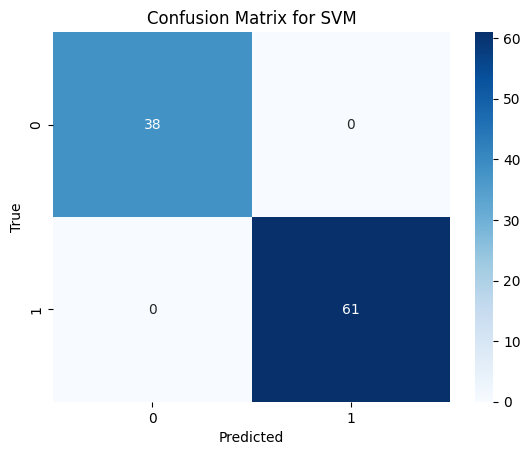

In [97]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [98]:
# Classification report
print(f"SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        61

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [99]:
# 2. Naive Bayes
print("\nEvaluating Naive Bayes:")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)



Evaluating Naive Bayes:


In [100]:
# Calculate F1-score
f1_nb = f1_score(y_test, y_pred_nb)
print(f"Naive Bayes F1-score: {f1_nb:.4f}")


Naive Bayes F1-score: 0.9917


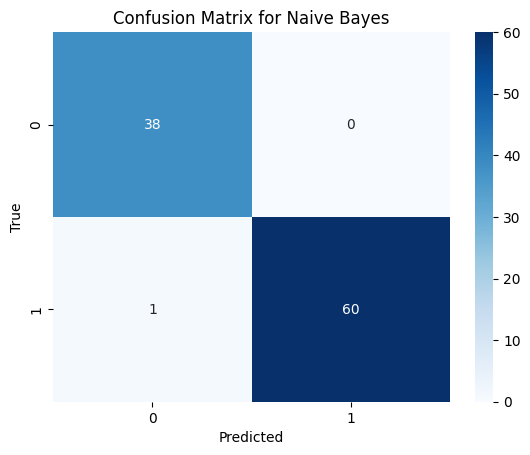

In [102]:
# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [103]:
# Classification report
print(f"Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.98      0.99        61

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99



In [104]:
# 3. Random Forest
print("\nEvaluating Random Forest:")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


Evaluating Random Forest:


In [105]:
# Calculate F1-score
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest F1-score: {f1_rf:.4f}")

Random Forest F1-score: 0.9839


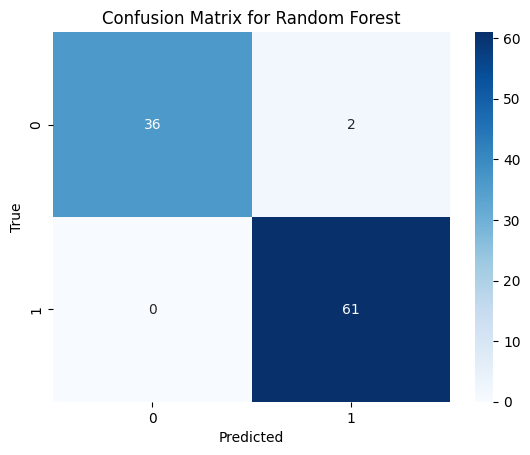

In [106]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [107]:
# Classification report
print(f"Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.97      1.00      0.98        61

    accuracy                           0.98        99
   macro avg       0.98      0.97      0.98        99
weighted avg       0.98      0.98      0.98        99



In [108]:
# 4. CatBoost
print("\nEvaluating CatBoost:")
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)


Evaluating CatBoost:


In [109]:
# Calculate F1-score
f1_catboost = f1_score(y_test, y_pred_catboost)
print(f"CatBoost F1-score: {f1_catboost:.4f}")

CatBoost F1-score: 1.0000


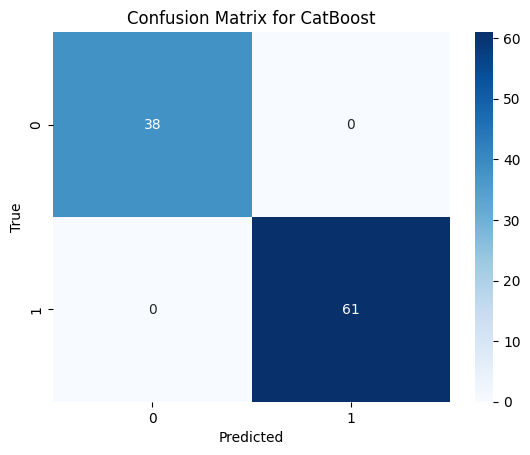

In [110]:
# Confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
sns.heatmap(cm_catboost, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for CatBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [111]:
# Classification report
print(f"CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost))

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        61

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [112]:
# 6. XGBoost
print("\nEvaluating XGBoost:")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


Evaluating XGBoost:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:11:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [113]:
# # Calculate F1-score
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost F1-score: {f1_xgb:.4f}")

XGBoost F1-score: 1.0000


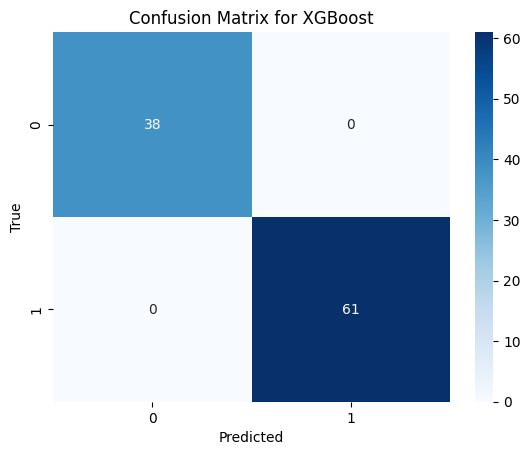

In [114]:

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [115]:
# Classification report
print(f"XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        61

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [116]:
# Summary of F1-scores for comparison
print("\nModel F1-scores:")
print(f"SVM: {f1_svm:.4f}")
print(f"Naive Bayes: {f1_nb:.4f}")
print(f"Random Forest: {f1_rf:.4f}")
print(f"CatBoost: {f1_catboost:.4f}")
#print(f"LightGBM: {f1_lgbm:.4f}")
print(f"XGBoost: {f1_xgb:.4f}")

# Model selection based on F1-score
best_model_name = max(
    [("SVM", f1_svm),
     ("Naive Bayes", f1_nb),
     ("Random Forest", f1_rf),
     ("CatBoost", f1_catboost),
   #  ("LightGBM", f1_lgbm),
     ("XGBoost", f1_xgb)],
    key=lambda x: x[1]
)[0]
print(f"\nThe best model based on F1-score is: {best_model_name}")


Model F1-scores:
SVM: 1.0000
Naive Bayes: 0.9917
Random Forest: 0.9839
CatBoost: 1.0000
XGBoost: 1.0000

The best model based on F1-score is: SVM
